In [1]:
import numpy as np
import matplotlib.pyplot as plt

import qiskit
from qiskit.providers.aer.noise.errors.standard_errors import thermal_relaxation_error
from qiskit.providers.aer.noise import NoiseModel

from qiskit.ignis.characterization.coherence import T1Fitter
from qiskit.ignis.characterization.coherence import t1_circuits

In [2]:
from qiskit.tools.jupyter import *
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [3]:
backend = provider.get_backend('ibmq_armonk')

In [10]:
num_of_gates = (np.linspace(0, 1000, 35)).astype(int)
gate_time = 0.1

qubit = [0]

#Il T1 circuit è composto da un X gate seguito da tot Identity gate
t1_circs, t1_xdata = t1_circuits(num_of_gates, gate_time, qubit)

In [11]:
shots = 2000

# Let the simulator simulate the following times for qubit 0:
t_q0 = 150.0

# Run the simulator
t1_backend_result = qiskit.execute(t1_circs, backend, shots=shots).result()

[323.415356544944]
[214.8772350232379]
{'0': [array([8.05373840e-01, 3.23415357e+02, 9.80041750e-02])]}
{'0': [array([  0.46160216, 214.87723502,   0.46436556])]}


<Figure size 1080x432 with 0 Axes>

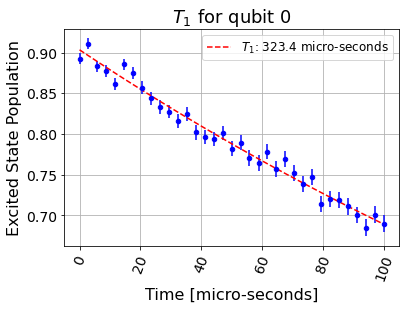

In [12]:
# Fitting T1

plt.figure(figsize=(15, 6))

t1_fit = T1Fitter(t1_backend_result, t1_xdata, qubit,
                  fit_p0=[1, t_q0, 0],
                  fit_bounds=([-0.5, 120, -2], [2, 420, 2]))
print(t1_fit.time())
print(t1_fit.time_err())
print(t1_fit.params)
print(t1_fit.params_err)

t1_fit.plot(0)
plt.show()

In [ ]:
###Fit Bounds con risultati compatibili agli attesi
    # [-0.5 150 -2] [2 220 2]  --> num gates 0 1500 70 
    # [-0.5 120 -2] [2 420 2]--> num 0 1500 35; num shots 2000